In [4]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe {font-size:12px;}
</style>
"""))

<font size='6' color='red'>ch10. N차원 배열(Numpy 배열) 다루기</font>
- [numpy](http://www.numpy.org)
- [numpy docs](http://www.numpy.org/doc/stable)
- 2차원 배열은 행렬내념으로 이해
- numpy 패키지를 이용(C언어로 구현된 고성능 수치계산 패키지)

# 1절 numpy 패키지

In [4]:
import numpy as np
np.__version__

'1.23.5'

In [6]:
#np.arrange(from, stop, by) : from부터 stop 앞까지 by씩 증가하는 1차원 배열을 생성
a = np.arange(15) # 0부터 15 앞까지 1씩 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [13]:
from numpy import arange
a = arange(15,
          #dtype=np.int8 # 8 bit int로 배열 만들기 (default value of dtype : int32)
          ).reshape(3,5) # 3행 5열 2차원 배열로 변환
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [14]:
type(a)

numpy.ndarray

In [17]:
a.dtype # a배열의 요소들의 type

dtype('int32')

In [20]:
a.dtype.name

'int32'

In [21]:
a.itemsize #a 배열안의 한 요소의 bytesize

4

In [22]:
a.ndim # 축수(차원수)

2

In [25]:
a.size # 배열 요소의 갯수

15

In [26]:
a.shape # 배열의 구조(3행5열)

(3, 5)

In [30]:
print('shape 조정 전 a\n', a, '\n')
a.shape = (5, 3)
print('shape 조정 후 a\n', a)

shape 조정 전 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]] 

shape 조정 후 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


## 1.2 배열 타입 변경

In [32]:
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [34]:
a.size, a.dtype, a.itemsize

(12, dtype('int32'), 4)

In [35]:
a.dtype = np.int64 # 읽을때 int64(64bit씩) 읽는다다
a.dtype 

dtype('int64')

In [37]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [39]:
a.itemsize, a.size

(8, 6)

In [48]:
# dtype을 변경하고 싶다면
a = arange(12).reshape(3,4)
a.astype(np.int64)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [49]:
a = a.astype('int64')
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [50]:
a.itemsize, a.size

(8, 12)

In [55]:
a.ravel(), a.flatten() # flatten 된 배열 return

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64))

## 1.3 배열 저장
- pkl(객체, 배열, 머신러닝 모델 저장) vs npy(numpy 전용 포멧으로 저장, io 속도계산) 파일 둘 중 하나로 저장 가능

In [56]:
import pickle
with open('data/ch10.pkl', 'wb') as f:
    pickle.dump(a, f)

In [57]:
with open('data/ch10.pkl', 'rb') as f:
    loaded_a = pickle.load(f)
loaded_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [58]:
np.save('data/ch10.npy', a)

In [60]:
loaded_a2 = np.load('data/ch10.npy')
loaded_a2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

# 2절 numpy 배열
- array() 함수를 이용하여 다른 파이썬 구조 (list, tuple)를 배열로 변환
- 기타함수 : arange, ones, zeros, full, empty, linspace ...
- 랜덤값을 갖는 함수들 : np.random.~

## 2.1 array() 함수로 numpy 배열 만들기
- array(obj, dtype, copy=T/F)

In [61]:
a = np.array([2,4,6], dtype=np.int16)
a

array([2, 4, 6], dtype=int16)

In [62]:
a[0], a[1], a[2]

(2, 4, 6)

In [79]:
b = np.array([[1.0, 2.3],  #배열은 동일 자료형의 집합 : 정수 -> 실수 -> 문자
             [4   , 5]])
b

array([[1. , 2.3],
       [4. , 5. ]])

In [80]:
b[0][1], b[0,1] #2차원 [axis0행, axis1열]

(2.3, 2.3)

In [81]:
print(b.dtype) # 실수 기본타입은 float64
print(b.itemsize)

float64
8


In [82]:
b = b.astype(np.float32)
b

array([[1. , 2.3],
       [4. , 5. ]], dtype=float32)

In [83]:
print(b.dtype) # 실수 기본타입은 float64
print(b.itemsize)

float32
4


In [84]:
for row in b:
    for col in row:
        print(col, end='\t')
    print() #개행

1.0	2.3	
4.0	5.0	


In [88]:
for i, row in enumerate(b):
    for j, col in enumerate(row):
        print('{}행 {}열 : {:.1f}({})'.format(i, j, col, b[i,j]), end='\t')
    print()

0행 0열 : 1.0(1.0)	0행 1열 : 2.3(2.299999952316284)	
1행 0열 : 4.0(4.0)	1행 1열 : 5.0(5.0)	


In [92]:
# 행렬의 인덱싱, 슬라이싱
b = np.array([[1,2,3,4,5], [6,7,8,9,10], [11,12,13,14,15]], dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]], dtype=int16)

In [93]:
#인덱싱
b[0,1]

2

In [94]:
b[3,0] #없는 인덱싱시 에러

IndexError: index 3 is out of bounds for axis 0 with size 3

In [115]:
print('0~1행, 1~2열 : \n', b[0:2,1:3]) 
print('2행 모두 : \n', b[2])
print('4열(마지막열) 모두: \n', b[:,-1:], b[...,-1])
print('2행 0~3열 : \n', b[2,0:4])
print('마지막 열을 제외 : \n', b[:, :-1])

0~1행, 1~2열 : 
 [[2 3]
 [7 8]]
2행 모두 : 
 [11 12 13 14 15]
4열(마지막열) 모두: 
 [[ 5]
 [10]
 [15]] [ 5 10 15]
2행 0~3열 : 
 [11 12 13 14]
마지막 열을 제외 : 
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


In [116]:
# 복제
## 스칼라 변수
a = 10
copy_a = a
print(f"a={a} 복제본={copy_a}")
copy_a = -1
print(f"a={a} 복제본={copy_a}")

a=10 copy_a=10
a=10 copy_a=-1


In [117]:
## 데이터 구조
a = [0, 1]
copy_a = a.copy() #깊은 복사
print(f"a={a}, 복제본={copy_a}")
copy_a[0] = -1
print(f"a={a}, 복제본={copy_a}")

a=[0, 1], 복제본=[0, 1]
a=[0, 1], 복제본=[-1, 1]


In [124]:
## np 배열
c = np.array([[1,2], [3,4]])
#d = c #주소 할당
#d = np.array(c, copy=True) #깊은 복사
d = c.copy()
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c), id(d))
d[0,0] = 9
print('c=', c, sep='\n')
print('d=', d, sep='\n')

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
1590895522416 1590895518864
c=
[[1 2]
 [3 4]]
d=
[[9 2]
 [3 4]]


## 2.2 기본값이 있는 배열 만들기
- np.zeros((배열축)) : 요소들이 다 0
- np.ones((배열축)) : 요소들이 다 1
- np.full((배열축), 기본값) : 요소들이 다 기본값(두번째 매개변수)
- np.empty((배열축)) : 초기내용은 임의 값인 배열(메모리 상태에 따라 초기값 달라짐) (random 값이 아님)

※ 위의 함수를 이용해서 생성된 배열은 기본 dtype=float64. dtype속성을 따로 지정 가능

In [9]:
import numpy as np
x = np.zeros((3,)) # 3열짜리 1차원 float64 배열(요소들은 다 0)
x

array([0., 0., 0.])

In [11]:
x = np.zeros((2,5), dtype=np.bool8)
print(x)
print(x.dtype)
print(x.itemsize)

[[False False False False False]
 [False False False False False]]
bool
1


In [13]:
np.ones((2,5), dtype=np.complex64)

array([[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]], dtype=complex64)

In [15]:
np.full( (2,3), 125)

array([[125, 125, 125],
       [125, 125, 125]])

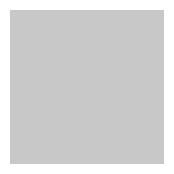

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (2,2)) # 시각화한 그래프 크기 figsize=(가로, 세로)
img = np.full((28,28), 200, dtype=np.uint8)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off') # 축 없애기
plt.show()

In [34]:
np.empty((3,2)) #초기값이 메모리 상태에 따라 다름

array([[  0.,   0.],
       [  0., 200.],
       [200.,   0.]])

## 2.3 랜덤값을 갖는 배열 만들기
- np.random.random((배열축)) : 0부터 1 미만의 균등분포를 갖는 랜덤값 n차원 배열
- np.random.uniform(low=0, high=1, size=(배열축)) : low와 high 사이의 균등분포를 갖는 랜덤값 n차원 배열
- np.random.normal(loc=0.0, scale=1.0, size=(배열축)) : 평균 loc과 표준편차 scale을 갖는 정규분포 랜덤값 n차원 배열

- np.random.rand(n) : 0부터 1 미만의 균등분포를 갖는 랜덤값 1차원 배열
- np.random.randn(n) : 표준정규부표(평균 0, 표준편차 1)
cf) np.random.randint(from, to) : from부터 to 미만의 정수 난수 1개 발생 == random.randint(from, to-1)

In [35]:
import random
random.randint(1,3) # 1, 2, 3 중 하나

38

In [36]:
np.random.randint(1, 3) # 1, 2 중 하나

15

In [37]:
np.random.random((2,3))

array([[0.34708143, 0.41847989, 0.50108088],
       [0.94188175, 0.97949118, 0.91271481]])

<function matplotlib.pyplot.show(close=None, block=None)>

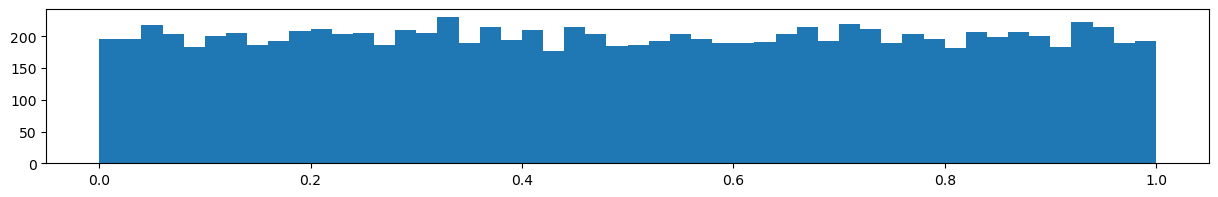

In [44]:
# 1차원 난수 배열
x = np.random.rand(10000) #균등분포
plt.figure(figsize = (15,2))
plt.hist(x, bins=50)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

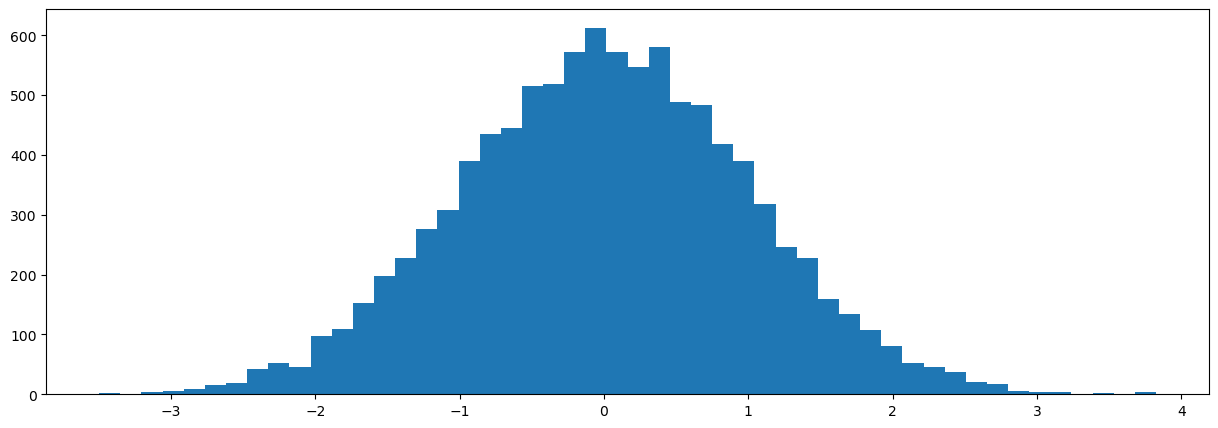

In [48]:
x = np.random.randn(10000) # 정규분포
plt.figure(figsize = (15,5))
plt.hist(x, bins = 50)
plt.show

In [49]:
# 2차원 난수 배열
np.random.random((2,5)) # 2행 5열짜리 균등분포(0~1) 난수 배열

array([[0.76006065, 0.6707228 , 0.80636733, 0.59771632, 0.36960378],
       [0.69724014, 0.25424098, 0.32299096, 0.15843252, 0.06434958]])

In [51]:
np.random.uniform(low=-2, high=2, size=(2,5)) # 2행 5열짜리 균등분포(-2~2) 난수 배열

array([[-0.75083705, -1.71870675, -0.27569289,  1.44399335,  1.75895332],
       [ 1.69268347,  0.2484431 , -1.40007589, -1.3660758 , -0.64183533]])

In [52]:
np.random.normal(size=(2,5)) # 2행 5열짜리 정규분포(평균 0 표준편차 1) 난수 배열

array([[-0.56237623, -0.36098522,  0.34352602,  0.39529929, -0.81687217],
       [-1.61950369,  1.54898234, -0.49571162,  0.72381998,  0.09070165]])

In [54]:
np.random.normal(-1, 1,size=(2,5)) # 2행 5열짜리 정규분포(평균 -1 표준편차 1) 난수 배열

array([[-2.69239006, -1.73661149, -0.18928588,  0.26250645, -0.76330854],
       [-0.54725911, -2.3107791 , -0.22797376, -2.78566854, -0.48720946]])

## 2.4 연속된 값을 갖는 1차원 배열 만들기
- np.arange(from, to, by, dtype) : from부터 to 앞까지 by씩 건너뛴 값을 1차원 배열로 생성
- np.linspace(from, to, num) : from부터 to(to포함)까지 num개 숫자들을 1차원 배열로 생성

In [56]:
np.arange(10, 30, 5, dtype=np.float64)

array([10., 15., 20., 25.])

In [58]:
np.arange(0, 2.0, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

In [59]:
np.linspace(0, 5, 6)

array([0., 1., 2., 3., 4., 5.])

In [68]:
#linspace : 특정한 범위의 수들을 많이 생성할 때
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)

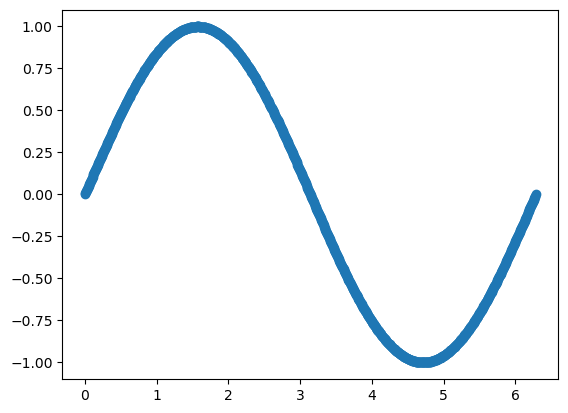

In [69]:
plt.scatter(x,y)
plt.show()

## 2.5 배열의 차원변경
- reshape(행수, 열수) : -1이 가능
- resize(행수, 열수) : -1이 불가
- T : 전치행렬로 변환 (transpose)
- transpose() : 전치행렬로 변환

※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열이 수정됨

In [70]:
t = np.random.random((2,3))
t

array([[0.15727944, 0.84614326, 0.90604466],
       [0.68771433, 0.90480819, 0.31860099]])

In [71]:
a = np.round(t*10) # 반올림
a

array([[2., 8., 9.],
       [7., 9., 3.]])

In [73]:
a = a.astype(np.int16)
a

array([[2, 8, 9],
       [7, 9, 3]], dtype=int16)

In [75]:
a = a.reshape(-1,1) # -1이 주어지면 해당 차원의 크기가 자동 계산된다
a

array([[2],
       [8],
       [9],
       [7],
       [9],
       [3]], dtype=int16)

In [76]:
a = a.reshape(3,-1) # -1이 주어지면 해당 차원의 크기가 자동 계산된다
a

array([[2, 8],
       [9, 7],
       [9, 3]], dtype=int16)

In [78]:
a.resize(2,3)
a

array([[2, 8, 9],
       [7, 9, 3]], dtype=int16)

In [79]:
a.resize(2,-1) # resize는 -1 사용불가

ValueError: negative dimensions not allowed

In [84]:
# 전치행렬 (x행y열 -> y행x열)
a = a.T
a

array([[2, 7],
       [8, 9],
       [9, 3]], dtype=int16)

In [87]:
a.transpose()

array([[2, 8, 9],
       [7, 9, 3]], dtype=int16)

## 2.6 배열 출력

In [90]:
np.arange(2000) # 아이템 숫자가 1000개가 넘어가면 숫자를 전부 프린트하지 않음

array([   0,    1,    2, ..., 1997, 1998, 1999])